In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../../../")

In [2]:
import MLP.preprocessing as pp
import MLP.plottingFunctions as pltf
import MLP.clustering as clt
import MLP.normas as norm

Getting the Iris dataset

In [3]:
from sklearn.datasets import load_iris

iris= load_iris()
data = iris.data

# Normalize data
data = pp.normalize_min_max(data)

## Calculate Distances

In [4]:
# Posibles normas = euclideana, lp, manhattan y cosine
# eculideana = norm.distance_matrix(data, metric = "euclidean")
# lp = norm.distance_matrix(data, metric = "lp", parameter=cualquier real o "inf")
# manhattan = norm.distance_matrix(data, metric = "manhattan")

# Clustering

## Metodo 1
Cajas de Juan

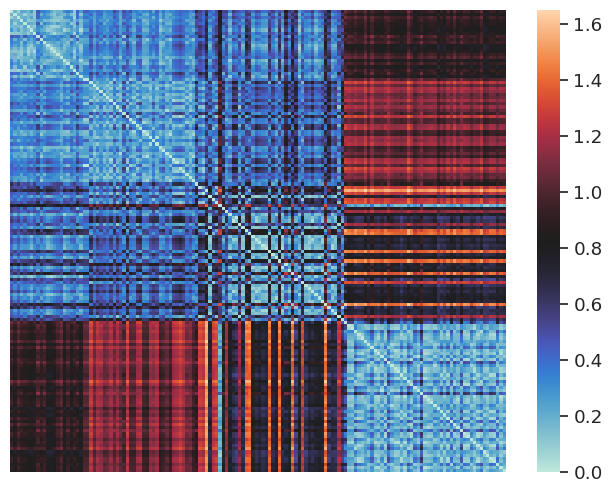

In [5]:
dist = norm.distance_matrix(data, metric="euclidean") # la euclidea funciono mejor en este caso
boxes = clt.boxes(dist, div = 4, sort = "boxes", symmetrical=False) # sort = "boxes" cajas preestablecida, si se elige sort = "distance" se define por la distancia
dist_sorted = norm.sort_dist_matrix_boxes(dist, boxes=boxes)
pltf.plot_heatmap(dist_sorted, cmap = "icefire")

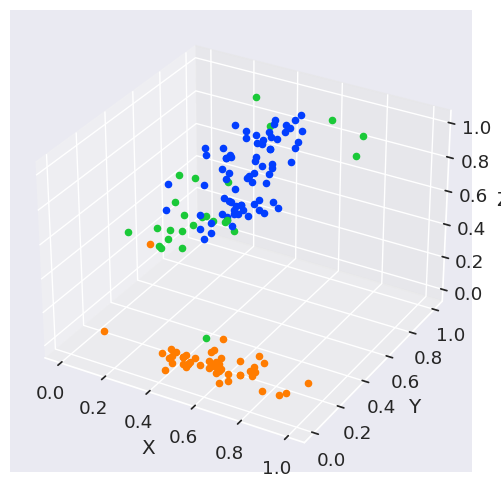

In [6]:
# Creamos los cluster a partir de las cajas
box_clusters = clt.boxes_cluster(dist, 4)

pltf.plot_data_by_clusters_3d(data, box_clusters, "bright", axis=[1,2,3])

## metodo 2
Parecido a DBSCAN

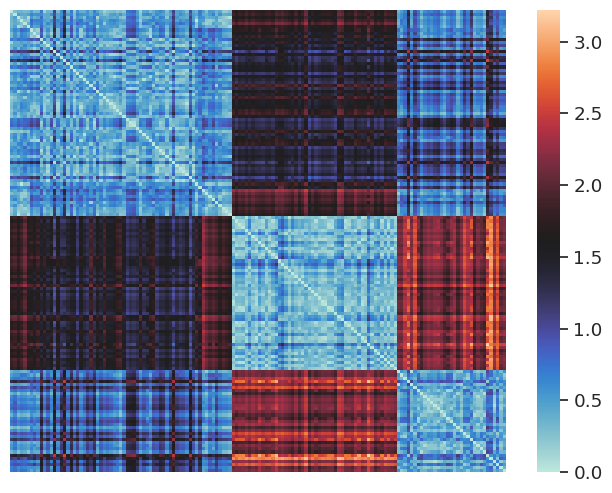

In [7]:
dist = norm.distance_matrix(data, metric="lp", parameter=1) # la lp_1 funciona mejor en este caso
nearby_cluster = clt.nearby_cluster(dist, epsilon = 0.05, max_clusters=3) # epsilon = distancia maxima entre punto y punto, y max_clusters es cuantos cluters se quiere que hayan
pltf.plot_distance_matrix_by_clusters(dist, nearby_cluster, cmap = "icefire")

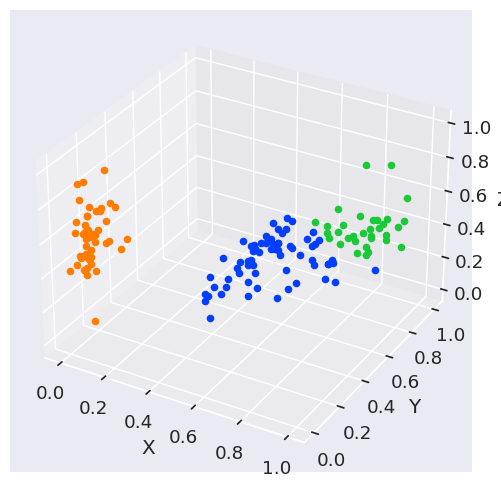

In [11]:
pltf.plot_data_by_clusters_3d(data, nearby_cluster, "bright", axis=[3,2,1])

## Comparacion con los clusters reales

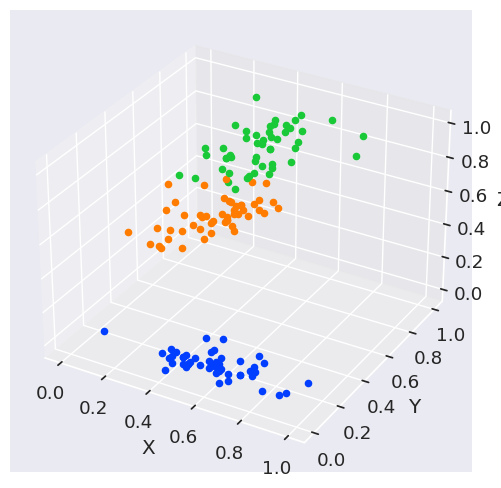

In [12]:
real_clusters = {cluster:[x for x in range(len(data)) if iris.target[x] == cluster] for i,cluster in enumerate(iris.target)}
pltf.plot_data_by_clusters_3d(data, real_clusters, "bright", axis=[1,2,3])

In [19]:
def find_dense_units(data, min_density):
  """Finds dense units in a dataset.

  Args:
    data: A NumPy array containing the data.
    min_density: The minimum density required for a unit to be considered dense.

  Returns:
    A list of indices of the dense units.
  """

  # Calculate the number of data points in each unit.
  unit_counts = np.prod(data[:, :2], axis=1)

  # Find the indices of the dense units.
  dense_unit_indices = np.where(unit_counts >= min_density)[0]

  return dense_unit_indices

def find_cliques(data, min_clique_size):
  """Finds cliques in a dataset.

  Args:
    data: A NumPy array containing the data.
    min_clique_size: The minimum size of a clique.

  Returns:
    A list of cliques.
  """

  # Find the dense units in the dataset.
  dense_unit_indices = find_dense_units(data, min_density=min_clique_size)

  # Initialize the list of cliques.
  cliques = []

  # Recursively find cliques in the dataset.
  def find_cliques_recursive(current_clique, remaining_units):
    # If the current clique is large enough, add it to the list of cliques.
    if len(current_clique) >= min_clique_size:
      cliques.append(current_clique)

    # Otherwise, recursively find cliques in the remaining units.
    for unit_index in remaining_units:
      new_clique = current_clique + [unit_index]
      remaining_units.remove(unit_index)
      find_cliques_recursive(new_clique, remaining_units)

  # Find cliques in the dataset.
  find_cliques_recursive([], dense_unit_indices)

  return cliques


In [22]:
# Find cliques in the dataset.
cliques = find_cliques(data, min_clique_size=1)

# Print the cliques.
for clique in cliques:
  print(clique)